In [111]:
import numpy as np
import pandas as pd
from ast import literal_eval

data = pd.read_json('recipes_processed_key.json')
recipes = pd.read_csv('recipes_processed_2.csv', converters= {'ingredients': literal_eval})
print(recipes['ingredients'].head(10))

0         [13369, 7909, 8106, 6059, 1480, 8586, 10716]
1               [9673, 10810, 3992, 7952, 10738, 2018]
2    [5671, 13453, 3472, 12383, 12402, 10598, 6616,...
3    [11578, 8366, 10962, 8860, 12204, 8586, 10167,...
4    [12379, 328, 11771, 10716, 9043, 2636, 2570, 3...
5                             [7952, 12755, 4789, 323]
6    [4334, 5606, 10447, 5114, 9050, 8686, 8668, 10...
7    [9526, 11433, 4620, 4622, 2269, 4592, 10716, 4...
8               [2444, 2458, 12755, 572, 11703, 13179]
9    [11771, 12608, 572, 3992, 4647, 8686, 1595, 54...
Name: ingredients, dtype: object


In [113]:
new_ingredient_id = 1
id_to_new_id_map = {}
new_id_to_word_map = {}
word = ''
for i in range(len(data['ingredients'])):
    ingr = data['ingredients'][i].split()[0]
    if ingr != word:
        id_to_new_id_map[i] = new_ingredient_id
        new_id_to_word_map[new_ingredient_id] = ingr
        new_ingredient_id += 1
        word = ingr
    else:
        id_to_new_id_map[i] = new_ingredient_id
def map_ingredient_ids(ingredient_ids):
    return list(set([id_to_new_id_map.get(ing_id) for ing_id in ingredient_ids]))

recipes['ingredients'] = recipes['ingredients'].apply(map_ingredient_ids)

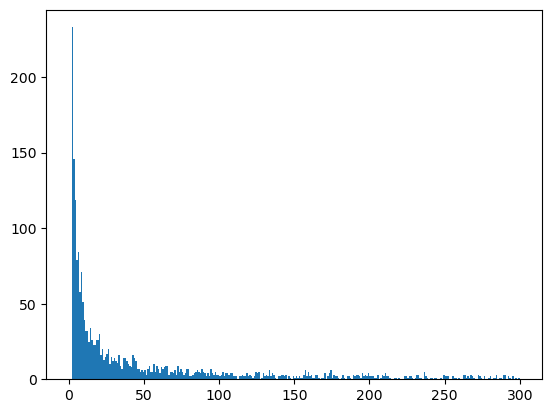

In [118]:
from collections import Counter
import matplotlib.pyplot as plt
all_ingr = np.concatenate(recipes['ingredients'].values)
c = Counter(all_ingr)
plt.hist(c.values(), 300, range = (0,300))
plt.savefig('frequency_of_new_ingredients')

In [121]:
to_remove = np.unique(np.array([key for key,value in c.items() if value == 1]))
print(len(to_remove))
recipes['ingredients'] = recipes['ingredients'].apply(lambda x: [i for i in x if i not in to_remove])

0


In [125]:
with open("new_ingredient_ids.json", "w") as outfile: 
    json.dump(new_id_to_word_map, outfile)
recipes.to_csv('recipes_with_new_ingredients.csv')